# ML algortihm

## 1. DATASET CLEANING

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn

In [ ]:
data = pd.read_csv("./input/diamonds_train.csv")
data.head()

In [23]:
print(data.dtypes)
data.head()

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object


,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.78,4,50,5,61.5,58.0,5.93,5.98,3.66,3446
1,0.31,5,70,3,60.8,56.0,4.37,4.32,2.64,732
2,0.30,5,50,3,62.3,54.0,4.30,4.34,2.69,475
3,1.04,5,60,6,62.0,58.0,6.54,6.46,4.03,9552
4,0.65,5,10,3,61.4,55.0,5.58,5.62,3.44,1276


In [4]:
data = data.set_index('id')

In [5]:
data['cut'].value_counts()

Ideal        16141
Premium      10303
Very Good     9068
Good          3631
Fair          1202
Name: cut, dtype: int64

In [6]:
corte = {
    "Ideal":5,
    "Premium":4,
    "Very Good":3,
    "Good":2,
    "Fair":1
    
}


data.cut.replace({
    "Ideal":5,
    "Premium":4,
    "Very Good":3,
    "Good":2,
    "Fair":1
    
}, inplace=True)


data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.78,4,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,0.31,5,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,0.30,5,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,1.04,5,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,0.65,5,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


In [7]:
data['clarity'].value_counts()

SI1     9710
VS2     9164
SI2     6884
VS1     6092
VVS2    3839
VVS1    2738
IF      1357
I1       561
Name: clarity, dtype: int64

In [8]:
claritydic = {
    "IF":8,
    "VVS1":7,
    "VVS2":6,
    "VS1":5,
    "VS2":4,
    "SI1":3,
    "SI2":2,
    "I1":1
}
data.clarity=data.clarity.map(claritydic)

data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.78,4,F,5,61.5,58.0,5.93,5.98,3.66,3446
1,0.31,5,D,3,60.8,56.0,4.37,4.32,2.64,732
2,0.30,5,F,3,62.3,54.0,4.30,4.34,2.69,475
3,1.04,5,E,6,62.0,58.0,6.54,6.46,4.03,9552
4,0.65,5,J,3,61.4,55.0,5.58,5.62,3.44,1276


In [9]:
data['color'].value_counts()

G    8462
E    7292
F    7133
H    6200
D    5094
I    4094
J    2070
Name: color, dtype: int64

In [10]:
colores = {
    "J":10,
    "I":20,
    "H":30,
    "G":40,
    "F":50,
    "E":60,
    "D":70,       
}

data.color=data.color.map(colores)

data.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [11]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.78,4,50,5,61.5,58.0,5.93,5.98,3.66,3446
1,0.31,5,70,3,60.8,56.0,4.37,4.32,2.64,732
2,0.30,5,50,3,62.3,54.0,4.30,4.34,2.69,475
3,1.04,5,60,6,62.0,58.0,6.54,6.46,4.03,9552
4,0.65,5,10,3,61.4,55.0,5.58,5.62,3.44,1276


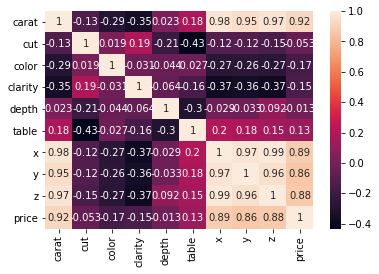

In [12]:
#data.drop(['x', 'y', 'z'], axis=1, inplace=True)
corre = data.corr()
sn.heatmap(corre, annot=True)

In [13]:
data['price'].mean()

3931.902243152807

In [14]:
data['price'].median()

2397.0

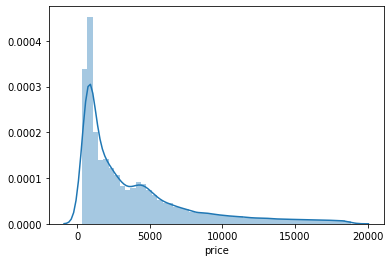

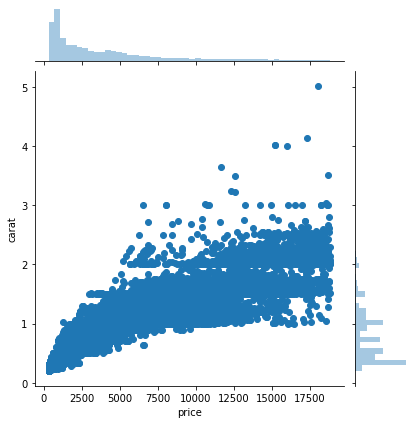

In [15]:
sn.distplot(data['price'])
sn.jointplot(x="price", y="carat", data=data)

## 2. MODEL APPLICATION

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
import matplotlib.pyplot as plt

#import h2o
#h2o.init()

#### 2.1. Pre-training

In [17]:
X = data.iloc[:,:-1]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

### Model #1: SVR

In [18]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("SVR RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

SVR RMSE: 4188.110754333499


### Model #2: Random forest

In [19]:
rf_reg = RandomForestRegressor(n_estimators=500, max_depth=20, min_samples_leaf=3, random_state=111)
selector = RFECV(rf_reg, step=1, cv=5)

rf_reg.fit(X_train, y_train)

print('Random forest RMSE', np.sqrt(mean_squared_error(y_test, rf_reg.predict(X_test))))

Random forest RMSE 552.8512236702744


### Model #3: Gradient Boosting Regressor

#### 2.2. Model fitting

In [20]:
params = {'n_estimators': 800, 'max_depth': 8, 'min_samples_split': 25, 'min_samples_leaf':10,
          'learning_rate': 0.01, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=25,
                          min_weight_fraction_leaf=0.0, n_estimators=800,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

#### 2.3. Error calculation

In [21]:
y_pred = clf.predict(X_test)
print("GBR RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

GBR RMSE: 534.5956875780087


## 3. MODEL APPLICATION TO TEST DATA

In [24]:
#3.1.Test data cleaning

datatest = pd.read_csv("./input/diamonds_test.csv")
datatest.head()

datatest = datatest.set_index('id')
#datatest.drop(['x', 'y', 'z'], axis=1, inplace=True)
datatest.head()

corte = {
    "Ideal":5,
    "Premium":4,
    "Very Good":3,
    "Good":2,
    "Fair":1
    
}


datatest.cut.replace({
    "Ideal":5,
    "Premium":4,
    "Very Good":3,
    "Good":2,
    "Fair":1}, inplace=True)

claritydic = {
    "IF":8,
    "VVS1":7,
    "VVS2":6,
    "VS1":5,
    "VS2":4,
    "SI1":3,
    "SI2":2,
    "I1":1
}
datatest.clarity=datatest.clarity.map(claritydic)

colores = {
    "J":10,
    "I":20,
    "H":30,
    "G":40,
    "F":50,
    "E":60,
    "D":70,       
}

datatest.color=datatest.color.map(colores)

In [25]:
#3.2. Model fitting
price = clf.predict(datatest) #Using GradientBoostingRegressor

In [26]:
#3.3. Creation of new dataset
datatest['price'] = price
prueba = datatest[['price']]

In [27]:
#3.4. Export
prueba.to_csv("output/test.csv")